In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Covid Data.csv')

In [3]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
df["DATE_DIED"].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

In [7]:
df["DEATH"]=[2 if each =="9999-99-99" else 1 for each in df["DATE_DIED"]]

In [8]:
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,1,2,2,2,2,2,3,97,1
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,1,2,2,1,1,2,5,97,1
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,3,2,1
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,7,97,1
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,1,2,2,2,2,2,3,97,1


In [9]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
DEATH                   0
dtype: int64

In [10]:
cols=['SEX', 'DATE_DIED',  
       'PNEUMONIA',   'PREGNANT', 'DIABETES', 'COPD',    
       'INMSUPR', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'TOBACCO',"ICU",'INTUBED']
df=df.drop(cols,axis=1)

In [11]:
import seaborn as sns

<AxesSubplot:>

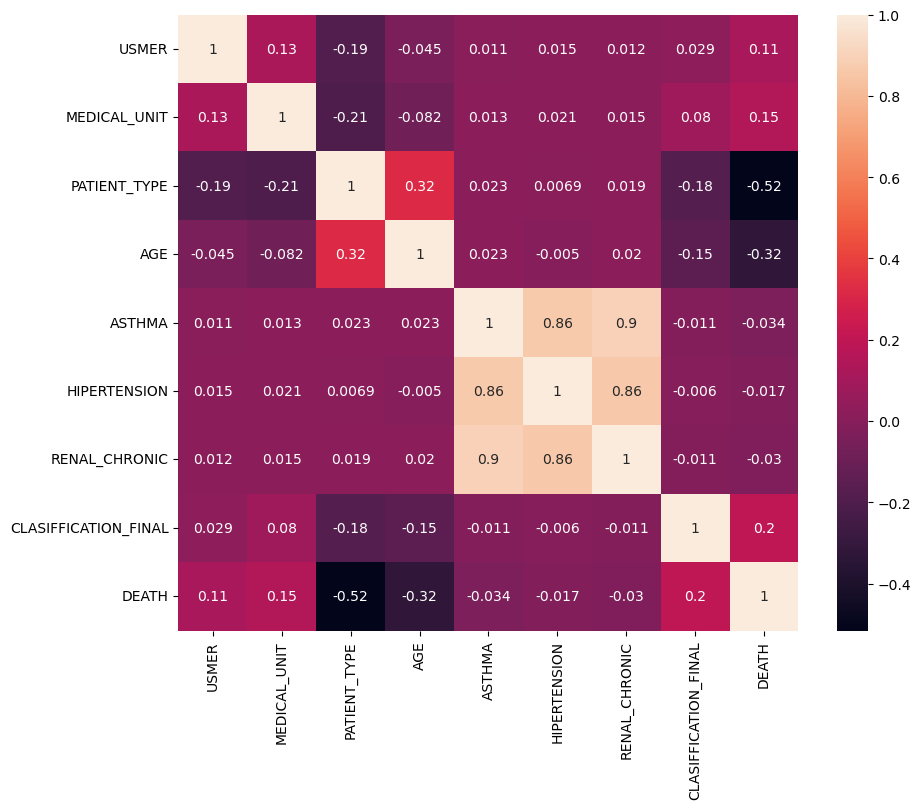

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [14]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [15]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: DEATH, dtype: int64

In [16]:
y.value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

In [17]:
x.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,AGE,ASTHMA,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL
0,2,1,1,65,2,1,2,3
1,2,1,1,72,2,1,1,5
2,2,1,2,55,2,2,2,3
3,2,1,1,53,2,2,2,7
4,2,1,1,68,2,1,2,3


In [18]:
df.columns

Index(['USMER', 'MEDICAL_UNIT', 'PATIENT_TYPE', 'AGE', 'ASTHMA',
       'HIPERTENSION', 'RENAL_CHRONIC', 'CLASIFFICATION_FINAL', 'DEATH'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   PATIENT_TYPE          1048575 non-null  int64
 3   AGE                   1048575 non-null  int64
 4   ASTHMA                1048575 non-null  int64
 5   HIPERTENSION          1048575 non-null  int64
 6   RENAL_CHRONIC         1048575 non-null  int64
 7   CLASIFFICATION_FINAL  1048575 non-null  int64
 8   DEATH                 1048575 non-null  int64
dtypes: int64(9)
memory usage: 72.0 MB


In [20]:
df.head()

,USMER,MEDICAL_UNIT,PATIENT_TYPE,AGE,ASTHMA,HIPERTENSION,RENAL_CHRONIC,CLASIFFICATION_FINAL,DEATH
0,2,1,1,65,2,1,2,3,1
1,2,1,1,72,2,1,1,5,1
2,2,1,2,55,2,2,2,3,1
3,2,1,1,53,2,2,2,7,1
4,2,1,1,68,2,1,2,3,1


In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43)

In [22]:
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()

In [23]:
lr.fit(x_train,y_train)

/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [25]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
y1=lr.predict(x_test)
y2=dt.predict(x_test)
y3=rf.predict(x_test)

In [27]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [28]:
s1=accuracy_score(y1,y_test)
s2=accuracy_score(y2,y_test)
s3=accuracy_score(y3,y_test)

In [29]:
print("Logistic Regression score:",s1)
print("Decision Tree Classifier score:",s2)
print("RandomForest Classifier score:",s3)

Logistic Regression score: 0.9343871444579548
Decision Tree Classifier score: 0.9348162983096107
RandomForest Classifier score: 0.9359845504613404


In [30]:
from sklearn.model_selection import cross_val_score

In [31]:
cvs1=cross_val_score(lr,x,y,scoring="accuracy")
cvs2=cross_val_score(dt,x,y,scoring="accuracy")
#cvs3=cross_val_score(rf,x,y,scoring="accuracy")

/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [32]:
print("Logistic Regression cv score:",np.mean(cvs1))
print("Decision Tree cv score:",np.mean(cvs2))
#print("RandomForest Classifier cv score:",np.mean(cvs3))

Logistic Regression cv score: 0.9009922990725509
Decision Tree cv score: 0.44613880742913


In [35]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
x_resampled,y_resampled = rus.fit_resample(x,y)

In [36]:
train_x, test_x, train_y, test_y = train_test_split(x_resampled,y_resampled, test_size=0.2, random_state=42)
print("Train_x :",train_x.shape)
print("Test_x :",test_x.shape)
print("Train_y :",train_y.shape)
print("Test_y :",test_y.shape)

Train_x : (123107, 8)
Test_x : (30777, 8)
Train_y : (123107,)
Test_y : (30777,)


In [37]:
logreg = LogisticRegression()
logreg.fit(train_x,train_y)
print("Logistic Regression Accuracy :",logreg.score(test_x, test_y))

cvs_1=cross_val_score(logreg,x_resampled,y_resampled,scoring="accuracy")
print("cross val score:",np.mean(cvs_1))

Logistic Regression Accuracy : 0.8924521558306527
cross val score: 0.8836070342719358


/Users/macbook-pro/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
print("Decision Tree Accuracy :",dtree.score(test_x, test_y))

cvs_2=cross_val_score(dtree,x_resampled,y_resampled,scoring="accuracy")
print("cross val score:",np.mean(cvs_2))

Decision Tree Accuracy : 0.8942067128050167
cross val score: 0.8441879411281767


In [39]:
rforest = RandomForestClassifier()
rforest.fit(train_x,train_y)
print("RandomForest Accuracy :",rforest.score(test_x, test_y))

cvs_3=cross_val_score(rforest,x_resampled,y_resampled,scoring="accuracy")
print("cross val score:",np.mean(cvs_3))

RandomForest Accuracy : 0.8958313025960944
cross val score: 0.8445063524923695
